In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load description of CSV files and then CSV file contents

In [2]:
with open('datasets.json') as f:
    datasets = json.load(f)

In [3]:
for dataset in datasets:
    dataset['frame'] = pd.read_csv(dataset['file'])

Creating Functions for Cleaning

In [4]:
def skip_rows_in_dataset(dataset):
    """Apply the skip row settings to a data frame.
    
    Args:
        dataset (dict): Dictionary describing the dataset with the data frame loaded.
    """
    df = dataset['frame']
    num_row_skip = dataset['num_row_skip']
    
    df.columns = df.iloc[num_row_skip]
    df = df[num_row_skip + 1:]
    df = df.reset_index().drop("index",axis=1)
    
    dataset['frame'] = df

    
def filter_dataset_to_catholic(dataset):
    """Filter to the catholic schools within a dataset.
    
    Args:
        dataset (dict): Dictionary describing the dataset with the data frame loaded.
    """
    df = dataset['frame']
    filter_key = dataset['denomination_key']
    filter_value = dataset['denomination_value']
    df = df[df[filter_key] == filter_value]
    dataset['frame'] = df


def filter_frame_invalid_values(df):
    """Delete rows from a data frame with invalid full time teacher values.
    
    Args:
        df (pandas.DataFrame): The data frame to modify.
    Returns:
        pandas.DataFrame: The updated data frame.
    """
    df = df[df['Full Time Teachers']!='1']
    df = df[df['Full Time Teachers']!='0']
    df = df[df['Full Time Teachers'].isnull()==False]
    return df

Skip first invalid rows

In [5]:
for dataset in datasets:
    skip_rows_in_dataset(dataset)

Filtering out non Catholic schools from the dataframes. 

In [6]:
for dataset in datasets:
    filter_dataset_to_catholic(dataset)

Deleting rows where teachers equal 0, 1, or blank

In [7]:
for dataset in datasets:
    dataset['frame'] = filter_frame_invalid_values(dataset['frame'])

Changing applicable rowns to integers types.

In [8]:
def cast_col_to_int(col):
    """Cast a column to an integer across all datasets.
    
    Args:
        col (str): The name of the column to cast.
    """
    for dataset in datasets:
        df = dataset['frame']
        df[col] = df[col].astype(int)

In [9]:
cast_col_to_int('Full Time Teachers')

In [10]:
cast_col_to_int('Total Enrollment')

Creating Student Teacher Ratio

In [11]:
for dataset in datasets:
    df = dataset['frame']
    df['stud_teach_ratio'] = df['Total Enrollment']/df['Full Time Teachers']

Creating means and sums of applicable columns.

In [12]:
frames = list(map(lambda x: x['frame'], datasets))

In [13]:
def calculate_mean(col):
    """Calculate the mean for each dataset within a column.
    
    Args:
        col (str): The name of the column for which the mean should be calculated.
    Returns:
        list: Mean for each dataset.
    """
    return list(map(lambda df: df[col].mean(), frames))

def calculate_sum(col):
    """Calculate the sum for each dataset within a column.
    
    Args:
        col (str): The name of the column for which the sum should be calculated.
    Returns:
        list: Sum for each dataset.
    """
    return list(map(lambda df: df[col].sum(), frames))

In [14]:
FTT_mean = calculate_mean('Full Time Teachers')

In [15]:
FTT_sum = calculate_sum('Full Time Teachers')

In [16]:
TE_mean = calculate_mean('Total Enrollment')

In [17]:
TE_sum = calculate_sum('Total Enrollment')

In [18]:
STR_mean = calculate_mean('stud_teach_ratio')

In [19]:
STR_sum = calculate_sum('stud_teach_ratio')

In [20]:

X = [2012,2013,2014,2015,2016,2017,2018,2019]


Graphing and describing the data

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


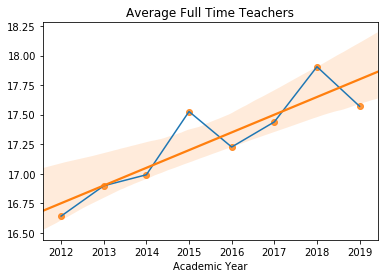

In [21]:
plt.plot(X, FTT_mean)
sns.regplot(X, FTT_mean,)
plt.title("Average Full Time Teachers")
plt.xlabel("Academic Year");

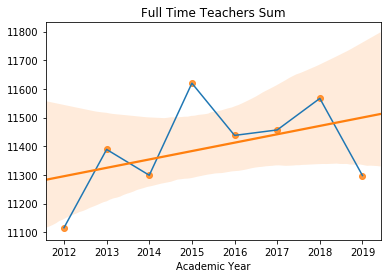

In [22]:
plt.plot(X, FTT_sum)
sns.regplot(X, FTT_sum)
plt.title("Full Time Teachers Sum")
plt.xlabel("Academic Year");

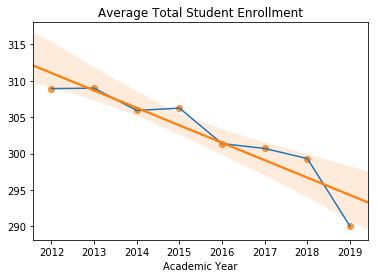

In [23]:
plt.plot(X, TE_mean)
sns.regplot(X, TE_mean)
plt.title("Average Total Student Enrollment")
plt.xlabel("Academic Year");

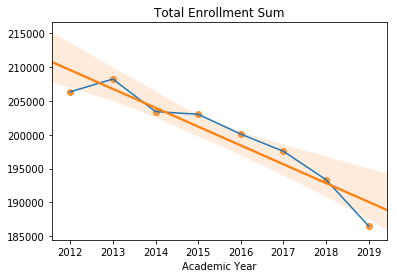

In [24]:
plt.plot(X, TE_sum)
sns.regplot(X, TE_sum)
plt.title("Total Enrollment Sum")
plt.xlabel("Academic Year");

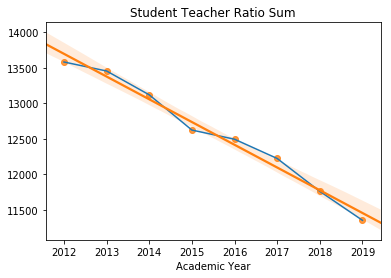

In [25]:
plt.plot(X, STR_sum)
sns.regplot(X, STR_sum)
plt.title("Student Teacher Ratio Sum")
plt.xlabel("Academic Year");

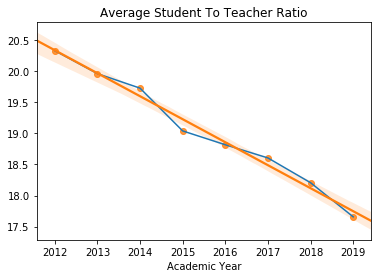

In [27]:
plt.plot(X, STR_mean)
sns.regplot(X, STR_mean)
plt.title("Average Student To Teacher Ratio")
plt.xlabel("Academic Year");

Sampling Full Time Teacher data.

In [29]:
frames_by_id = dict(map(
    lambda dataset: (dataset['id'], dataset),
    datasets
))

In [30]:
frames_by_id['1213']['frame']['Full Time Teachers'].describe()

count    674.000000
mean      16.897626
std       16.273934
min        2.000000
25%        9.000000
50%       11.000000
75%       16.000000
max      134.000000
Name: Full Time Teachers, dtype: float64

In [31]:
frames_by_id['1314']['frame']['Full Time Teachers'].describe()

count    665.000000
mean      16.990977
std       16.232588
min        2.000000
25%        9.000000
50%       11.000000
75%       17.000000
max      141.000000
Name: Full Time Teachers, dtype: float64

In [32]:
frames_by_id['1415']['frame']['Full Time Teachers'].describe()

count    663.000000
mean      17.526395
std       17.272443
min        2.000000
25%       10.000000
50%       11.000000
75%       17.000000
max      150.000000
Name: Full Time Teachers, dtype: float64